####### Calculating on the /cpu:0 #######
[[ 131.875   129.75    134.5    ...,  135.625   128.75    134.    ]
 [ 120.625   122.5     129.625  ...,  127.5     116.875   121.25  ]
 [ 127.375   120.3125  127.875  ...,  127.875   116.625   125.25  ]
 ..., 
 [ 126.875   129.625   131.5    ...,  130.5     121.25    129.75  ]
 [ 125.625   127.      128.     ...,  131.625   122.1875  122.5   ]
 [ 121.8125  124.      129.5    ...,  129.625   118.625   127.375 ]]
{'/cpu:0': [0.42816829681396484], '/gpu:0': []}
####### Calculating on the /gpu:0 #######
[[ 130.125   128.      122.1875 ...,  131.25    129.125   130.625 ]
 [ 127.5     127.875   121.3125 ...,  128.875   129.25    129.5   ]
 [ 125.      127.5625  119.5    ...,  125.      124.625   127.5   ]
 ..., 
 [ 127.625   133.      123.125  ...,  130.      127.5     127.5625]
 [ 129.375   131.625   124.875  ...,  126.6875  126.9375  135.5   ]
 [ 132.625   131.75    120.25   ...,  131.375   129.25    131.25  ]]
{'/cpu:0': [0.42816829681396484], '/

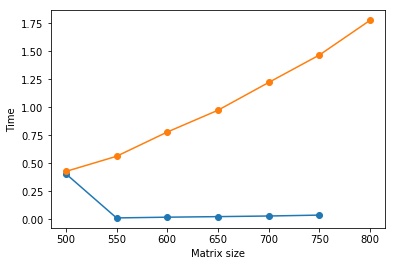

In [1]:
from __future__ import print_function
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import time

def get_times(maximum_time):

    device_times = {
        "/gpu:0":[],
        "/cpu:0":[]
    }
    matrix_sizes = range(500,50000,50)

    for size in matrix_sizes:
        for device_name in device_times.keys():

            print("####### Calculating on the " + device_name + " #######")

            shape = (size,size)
            data_type = tf.float16
            with tf.device(device_name):
                r1 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                r2 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                dot_operation = tf.matmul(r2, r1)


            with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as session:
                    start_time = time.time()
                    result = session.run(dot_operation)
                    time_taken = time.time() - start_time
                    print(result)
                    device_times[device_name].append(time_taken)

            print(device_times)

            if time_taken > maximum_time:
                return device_times, matrix_sizes


device_times, matrix_sizes = get_times(1.5)
gpu_times = device_times["/gpu:0"]
cpu_times = device_times["/cpu:0"]

plt.plot(matrix_sizes[:len(gpu_times)], gpu_times, 'o-')
plt.plot(matrix_sizes[:len(cpu_times)], cpu_times, 'o-')
plt.ylabel('Time')
plt.xlabel('Matrix size')
plt.show()
